# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [2]:
# create a simulated dataset without multicollinearity
np.random.seed(123)
n = 100
#Features  
x1 = np.random.normal(size=n)
#True Population Line
y = 1 + 2*x1 + np.random.normal(size=n, scale=0.5) 

data = pd.DataFrame({'x1': x1,'y': y})

# fit a linear regression model using statsmodels
X = sm.add_constant(data['x1'])
model = sm.OLS(data['y'], X).fit()

# print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2104.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.83e-68
Time:                        15:30:24   Log-Likelihood:                -69.520
No. Observations:                 100   AIC:                             143.0
Df Residuals:                      98   BIC:                             148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9905      0.049     20.213      0.0

In [3]:
data

,x1,y
0,-1.085631,-0.850234
1,0.997345,2.005747
2,0.282978,1.922089
3,-1.506295,-0.713437
4,-0.578600,-0.169513
...,...,...
95,1.031114,1.446701
96,-1.084568,-1.303783
97,-1.363472,-1.782368
98,0.379401,1.588170


In [5]:
#check the (X'X)^-1 matrix, an indication of coeff. variances
X = np.vstack(x1)
X_t= np.transpose(X)
XtX = np.dot(X_t, X)
np.linalg.inv(XtX)

array([[0.00785138]])

In [6]:
# create a simulated dataset with milder multicollinearity
np.random.seed(123)
n = 100
#Features
x1 = np.random.normal(size=n)
x2 = 0.5*x1 + np.random.normal(size=n, scale=0.1)
#True Population Line
y = 1 + 2*x1 + np.random.normal(size=n, scale=0.5)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# fit a linear regression model using statsmodels
X = sm.add_constant(data[['x1', 'x2']])
model = sm.OLS(data['y'], X).fit()

# print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1028.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.02e-66
Time:                        15:46:48   Log-Likelihood:                -69.269
No. Observations:                 100   AIC:                             144.5
Df Residuals:                      97   BIC:                             152.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9534      0.049     19.402      0.0

In [7]:
data

,x1,x2,y
0,-1.085631,-0.478610,-0.819606
1,0.997345,0.300884,2.695638
2,0.282978,0.212716,2.666308
3,-1.506295,-0.493317,-1.668441
4,-0.578600,-0.291763,-0.160354
...,...,...,...
95,1.031114,0.192452,3.410123
96,-1.084568,-0.569213,-0.231236
97,-1.363472,-0.692821,-1.519096
98,0.379401,0.155574,1.839073


In [8]:
#find the VIF of each variable to get a sense of amount of multicollenarity
#Rule of thumb VIF > 5 indicates a problematic amount of multicollinearity

vif_data = pd.DataFrame()
data.drop(columns='y', inplace=True)
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
vif_data

,feature,VIF
0,x1,34.607659
1,x2,34.607659


In [9]:
#check the (X'X)^-1 matrix, an indication of coeff. variances

X = np.concatenate((np.vstack(x1),np.vstack(x2)),axis=1)
X_t= np.transpose(X)
XtX = np.dot(X_t, X)
np.linalg.inv(XtX)

array([[ 0.27171788, -0.52953328],
       [-0.52953328,  1.06267942]])

In [10]:
#Checking correlation strength between the features x1 & x2
data.corr()

,x1,x2
x1,1.000000,0.985446
x2,0.985446,1.000000


<AxesSubplot:xlabel='x1', ylabel='x2'>

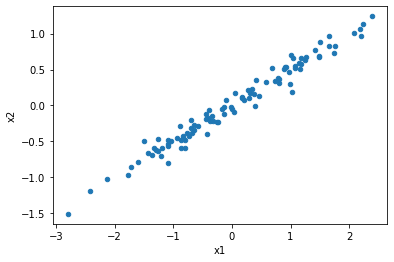

In [11]:
data.plot.scatter(x= 'x1',y='x2')

In [21]:
# create a simulated dataset with exact multicollinearity
np.random.seed(123)
n = 100
#Features 
x1 = np.random.normal(size=n)
x2 = 0.5*x1 
#True Population Line
y = 1 + 2*x1 + np.random.normal(size=n, scale=0.5)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# fit a linear regression model using statsmodels
X = sm.add_constant(data[['x1', 'x2']])
model = sm.OLS(data['y'], X).fit()

# print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2104.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.83e-68
Time:                        16:14:42   Log-Likelihood:                -69.520
No. Observations:                 100   AIC:                             143.0
Df Residuals:                      98   BIC:                             148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9905      0.049     20.213      0.0

In [22]:
data

,x1,x2,y
0,-1.085631,-0.542815,-0.850234
1,0.997345,0.498673,2.005747
2,0.282978,0.141489,1.922089
3,-1.506295,-0.753147,-0.713437
4,-0.578600,-0.289300,-0.169513
...,...,...,...
95,1.031114,0.515557,1.446701
96,-1.084568,-0.542284,-1.303783
97,-1.363472,-0.681736,-1.782368
98,0.379401,0.189700,1.588170


In [23]:
#check the (X'X)^-1 matrix, an indication of coeff. variances

X = np.concatenate((np.vstack(x1),np.vstack(x2)),axis=1)
X_t= np.transpose(X)
XtX = np.dot(X_t, X)
np.linalg.inv(XtX)

array([[ 7.03687442e+13, -1.40737488e+14],
       [-1.40737488e+14,  2.81474977e+14]])

In [26]:
#Checking correlation strength between the features x1 & x2
data.corr()

,x1,x2
x1,1.0,1.0
x2,1.0,1.0


In [25]:
#find the VIF of each variable to get a sense of amount of multicollenarity
#Rule of thumb VIF > 5 indicates a problematic amount of multicollinearity

vif_data = pd.DataFrame()
data.drop(columns='y', inplace=True)
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
vif_data

,feature,VIF
0,x1,inf
1,x2,inf
